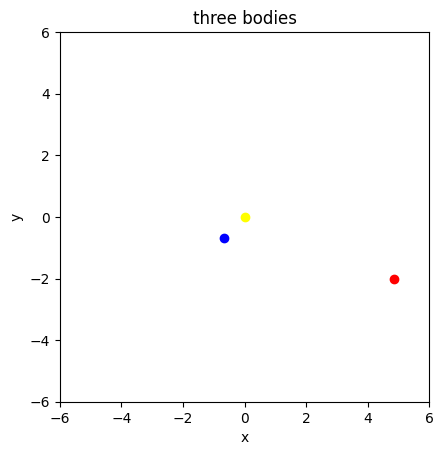

In [ ]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np


# time
t = 20  # end time
dt = 0.05  # year
time = np.arange(0, t, dt)


# list of conditions
x_e = np.zeros(len(time))  # x position of earth
y_e = np.zeros(len(time))  # y position of earth
vx_e = np.zeros(len(time))  # x velocity of earth
vy_e = np.zeros(len(time))  # y velocity of earth

x_j = np.zeros(len(time))  # x position of jupiter
y_j = np.zeros(len(time))  # y position of jupiter
vx_j = np.zeros(len(time))  # x velocity of jupiter
vy_j = np.zeros(len(time))  # y velocity of jupiter

# init parameters
M_S = 2.0e30  # mass of sun
M_E = 6.0e24  # mass of earth
M_J = 1.9e27  # mass of jupiter

x_e[0] = 1  # initial position of earth
y_e[0] = 0  # initial position of earth

vx_e[0] = 0  # initial velocity of earth
vy_e[0] = 2 * np.pi  # initial velocity of earth

x_j[0] = 0  # initial position of jupiter
y_j[0] = 5.2  # initial position of jupiter
vx_j[0] = -2 * np.pi / np.sqrt(5.2)  # initial velocity of jupiter
vy_j[0] = 0  # initial velocity of jupiter


r_e = np.zeros(len(time) - 1)  # distance between earth and sun
r_j = np.zeros(len(time) - 1)  # distance between jupiter and sun
r_EJ = np.zeros(len(time) - 1)  # distance between earth and jupiter


def calculate(x_e, y_e, vx_e, vy_e, x_j, y_j, vx_j, vy_j):
    for i in range(len(time) - 1):
        r_e[i] = np.sqrt(x_e[i] ** 2 + y_e[i] ** 2)  # distance between earth and sun
        r_j[i] = np.sqrt(x_j[i] ** 2 + y_j[i] ** 2)  # distance between jupiter and sun
        r_EJ[i] = np.sqrt((x_e[i] - x_j[i]) ** 2 + (y_e[i] - y_j[i]) ** 2)  # distance between earth and jupiter

        vx_e[i + 1] = vx_e[i] - 4 * np.pi**2 * x_e[i] / r_e[i] ** 3 * dt - 4 * np.pi**2 * (M_J / M_S) * (x_e[i] - x_j[i]) / r_EJ[i] ** 3 * dt
        vy_e[i + 1] = vy_e[i] - 4 * np.pi**2 * y_e[i] / r_e[i] ** 3 * dt - 4 * np.pi**2 * (M_J / M_S) * (y_e[i] - y_j[i]) / r_EJ[i] ** 3 * dt
        vx_j[i + 1] = vx_j[i] - 4 * np.pi**2 * x_j[i] / r_j[i] ** 3 * dt - 4 * np.pi**2 * (M_E / M_S) * (x_j[i] - x_e[i]) / r_EJ[i] ** 3 * dt
        vy_j[i + 1] = vy_j[i] - 4 * np.pi**2 * y_j[i] / r_j[i] ** 3 * dt - 4 * np.pi**2 * (M_E / M_S) * (y_j[i] - y_e[i]) / r_EJ[i] ** 3 * dt

        x_e[i + 1] = x_e[i] + vx_e[i + 1] * dt
        y_e[i + 1] = y_e[i] + vy_e[i + 1] * dt
        x_j[i + 1] = x_j[i] + vx_j[i + 1] * dt
        y_j[i + 1] = y_j[i] + vy_j[i + 1] * dt


# plot the orbit
fig, ax = plt.subplots()
ax.set_xlim(-6.0, 6.0)
ax.set_ylim(-6.0, 6.0)
ax.set_aspect("equal")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("three bodies")
(line1,) = ax.plot([], [], "o", color="blue")
(line2,) = ax.plot([], [], "o", color="red")
(line3,) = ax.plot([], [], "o", color="yellow")


def init():
    line1.set_data(x_e[0], y_e[0])
    line2.set_data(x_j[0], y_j[0])
    line3.set_data(0, 0)
    return line1, line2, line3


def animate(i):
    line1.set_data(x_e[i], y_e[i])
    line2.set_data(x_j[i], y_j[i])
    line3.set_data(0, 0)
    return line1, line2, line3


calculate(x_e, y_e, vx_e, vy_e, x_j, y_j, vx_j, vy_j)

ani = FuncAnimation(fig, animate, init_func=init, frames=len(time), interval=1, blit=True)
ani.save("three_bodies.gif", writer="pillow", fps=120)
plt.show()

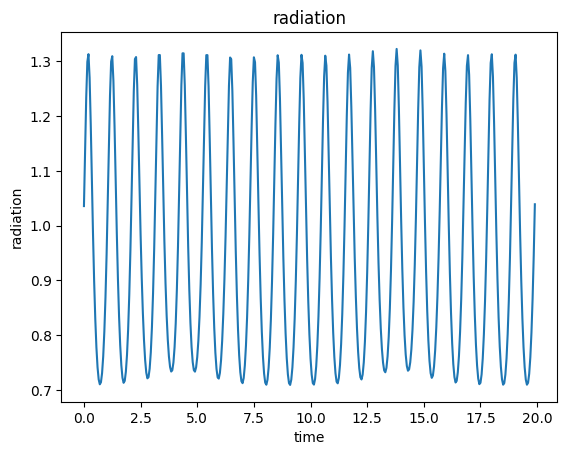

In [ ]:
# 辐照强度正比于 1/r^2，记录 1/(r2-r1)^2 + 1/(r3-r1)^2
def radiation(r_e, r_j, r_EJ):
    return 1 / r_e**2 + 1 / r_EJ**2


# plot
fig, ax = plt.subplots()
# ax.set_xlim(0, 10)
# ax.set_ylim(0, 10)
ax.set_xlabel("time")
ax.set_ylabel("radiation")
ax.set_title("radiation")

ax.plot(time[0:-1], radiation(r_e, r_j, r_EJ))
plt.show()